In [1]:
import os

%pip install wget
if not os.path.exists('thinkdsp.py'):
    !python -m wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from thinkdsp import Wave
from thinkdsp import decorate
import scipy.signal

# Упражнение 8.1
Блокнот для этой главы — chap08.ipynb. Прочитайте его и запустите код.

В нем есть интерактивный виджет, где можно экспериментировать с параметрами гауссова окна и изучить их влияние на частоту среза.

Что случится, если при увеличении ширины гауссова окна std не увеличивать число элементов в окне M?

In [2]:
from thinkdsp import SquareSignal

def zero_pad(array, n):
    """Extends an array with zeros.

    array: NumPy array
    n: length of result

    returns: new NumPy array
    """
    res = np.zeros(n)
    res[:len(array)] = array
    return res


def plot_filter(M=11, std=2):
    signal = SquareSignal(freq=440)
    wave = signal.make_wave(duration=1, framerate=44100)
    spectrum = wave.make_spectrum()

    gaussian = scipy.signal.gaussian(M=M, std=std)
    gaussian /= sum(gaussian)

    ys = np.convolve(wave.ys, gaussian, mode='same')
    smooth =  Wave(ys, framerate=wave.framerate)
    spectrum2 = smooth.make_spectrum()

    # plot the ratio of the original and smoothed spectrum
    amps = spectrum.amps
    amps2 = spectrum2.amps
    ratio = amps2 / amps    
    ratio[amps<560] = 0

    # plot the same ratio along with the FFT of the window
    padded =  zero_pad(gaussian, len(wave))
    dft_gaussian = np.fft.rfft(padded)

    plt.plot(np.abs(dft_gaussian), color='gray', label='Gaussian filter')
    plt.plot(ratio, label='amplitude ratio')

    decorate(xlabel='Frequency (Hz)', ylabel='Amplitude ratio')
    plt.show()

In [3]:
slider = widgets.IntSlider(min=2, max=100, value=11)
slider2 = widgets.FloatSlider(min=0, max=20, value=2)
interact(plot_filter, M=slider, std=slider2);

interactive(children=(IntSlider(value=11, description='M', min=2), FloatSlider(value=2.0, description='std', m…

C:\Users\User\AppData\Local\Temp\ipykernel_11496\1683523207.py:1: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated since SciPy 1.1.0 and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  gaussian = scipy.signal.gaussian(M=8, std=8)


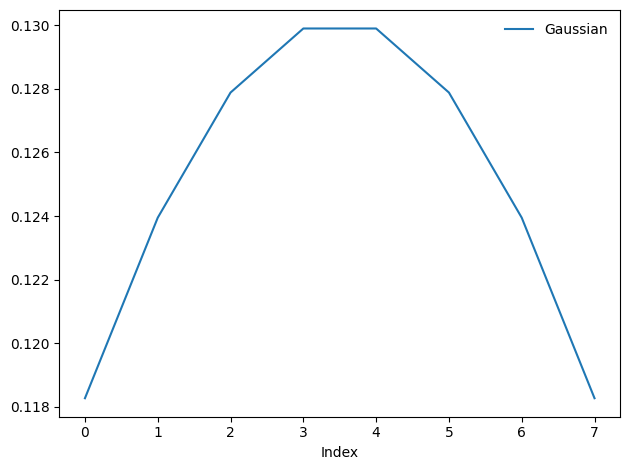

In [4]:
gaussian = scipy.signal.gaussian(M=8, std=8)
gaussian /= sum(gaussian)

plt.plot(gaussian, label='Gaussian')
decorate(xlabel='Index')

C:\Users\User\AppData\Local\Temp\ipykernel_11496\3070431002.py:1: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated since SciPy 1.1.0 and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  gaussian = scipy.signal.gaussian(M=8, std=800)


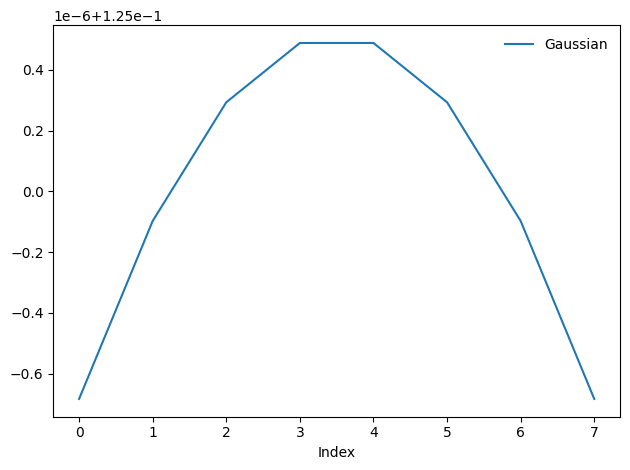

In [5]:
gaussian = scipy.signal.gaussian(M=8, std=800)
gaussian /= sum(gaussian)

plt.plot(gaussian, label='Gaussian')
decorate(xlabel='Index')

При увеличении std, кривая становится шире, а сам БПФ меньше.

# Упражнение 8.2

Блокнот для этой главы — chap08.ipynb. Прочитайте его и запустите код.

В нем есть интерактивный виджет, где можно экспериментировать с параметрами гауссова окна и изучить их влияние на частоту среза.

Что случится, если при увеличении ширины гауссова окна std не увеличивать число элементов в окне M?

C:\Users\User\AppData\Local\Temp\ipykernel_11496\1753056353.py:1: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated since SciPy 1.1.0 and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  gaussian = scipy.signal.gaussian(M=10, std=2)


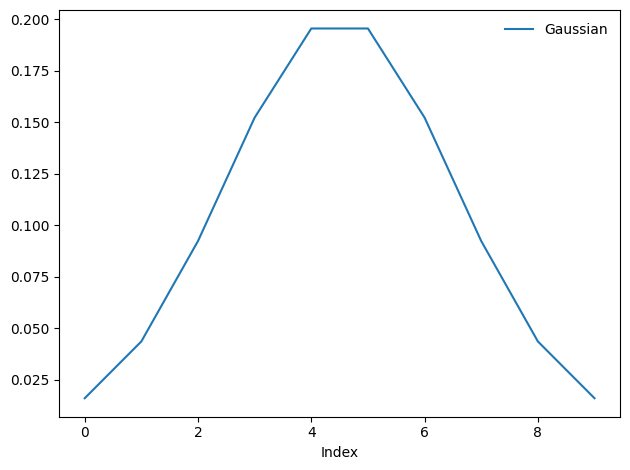

In [6]:
gaussian = scipy.signal.gaussian(M=10, std=2)
gaussian /= sum(gaussian)

plt.plot(gaussian, label='Gaussian')
decorate(xlabel='Index')

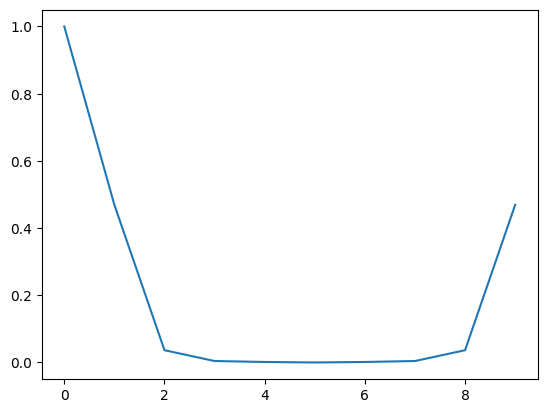

In [7]:
gaussian_fft = np.fft.fft(gaussian)
plt.plot(abs(gaussian_fft), label='Gaussian')

Осуществим свёртку:

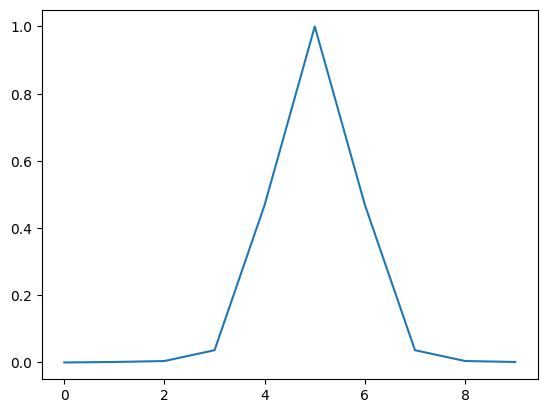

In [8]:

gaussian_fft_rolled = np.roll(gaussian_fft, len(gaussian) // 2)
plt.plot(abs(gaussian_fft_rolled), label='Gaussian')

Если std гауссовой кривой увеличивается, то преобразование Фурье становится уже.

# Упражнение 8.3


В упражнениях к главе 3 изучалось влияние на утечки спектра окна Хэмминга и некоторых других, предоставляемых NumPy. Глубже понять эти окна можно, изучив их ДПФ.

В дополнение к Гауссову окну, использованному в этой главе, создайте окно Хемминга тех же размеров. Дополните окно нулями и напечатайте его ДПФ. Какое окно больше подходит для фильтра НЧ? Полезно напечатать ДПФ с логарифмическим масштабом по y.

Поэкспериментируйте с разными окнами и разными размерами этих окон.

Для начала импортируем необходимые библиотеки и создадим квадратный сигнал:

In [9]:
from thinkdsp import SquareSignal

signal = SquareSignal(freq=440)
wave = signal.make_wave(duration=1.0, framerate=44100)

Теперь создадим несколько окон и зададим стандартное отклонение окна Гаусса, чтобы сделать его похожим на другие.


In [10]:
M = 15
std = 2.5

gaussian = scipy.signal.gaussian(M=M, std=std)   
bartlett = np.bartlett(M)
blackman = np.blackman(M)
hamming = np.hamming(M)
hanning = np.hanning(M)

windows = [blackman, gaussian, hanning, hamming]
names = ['blackman', 'gaussian', 'hanning', 'hamming']

for window in windows:
    window /= sum(window)

C:\Users\User\AppData\Local\Temp\ipykernel_11496\698470634.py:4: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated since SciPy 1.1.0 and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  gaussian = scipy.signal.gaussian(M=M, std=std)


Распечатаем окна.


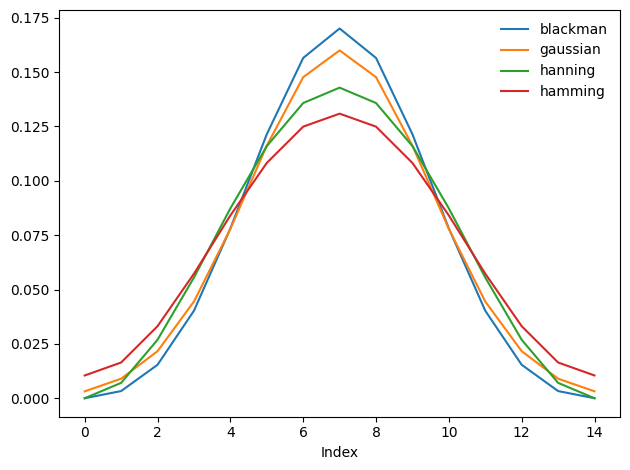

In [11]:
for window, name in zip(windows, names):
    plt.plot(window, label=name)

decorate(xlabel='Index')

Окна достаточно сильно похожи друг на друга. Теперь получим их ДПФ и рассмотрим его:

In [12]:
def zero_pad(array, n):
    """Extends an array with zeros.

    array: NumPy array
    n: length of result

    returns: new NumPy array
    """
    res = np.zeros(n)
    res[:len(array)] = array
    return res

In [13]:
def plot_window_dfts(windows, names):
    """
    """
    for window, name in zip(windows, names):
        padded =  zero_pad(window, len(wave))
        dft_window = np.fft.rfft(padded)
        plt.plot(abs(dft_window), label=name)

Можно заметить, что быстрее всего падает Хэмминг, Блэкман падает медленнее. Хэннинг имеет самые заметные боковые лепестки.

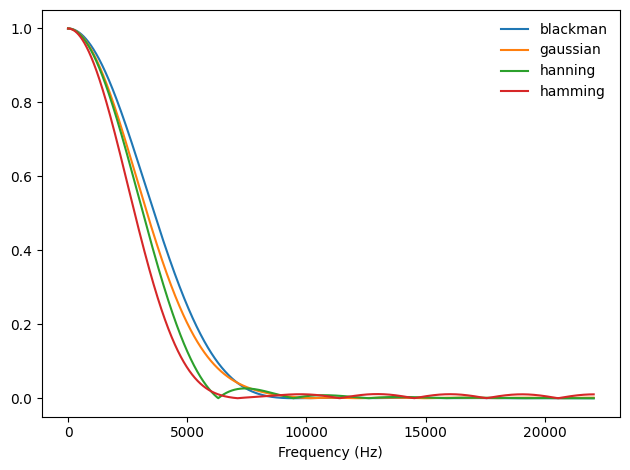

In [14]:
plot_window_dfts(windows, names)
decorate(xlabel='Frequency (Hz)')

Представим в логарифмическом масштабе.

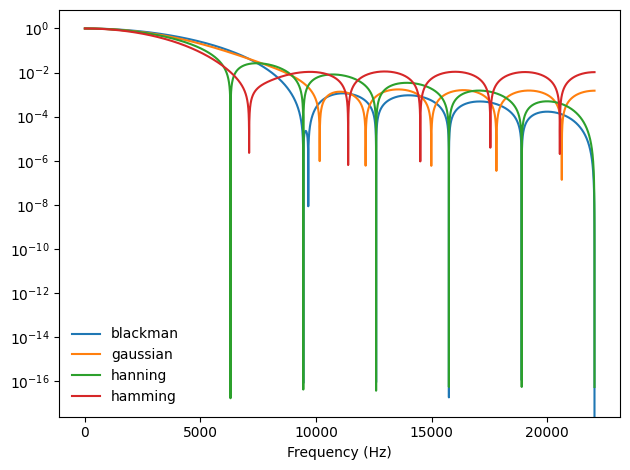

In [15]:
plot_window_dfts(windows, names)
decorate(xlabel='Frequency (Hz)', yscale='log')

В логарифмическом масштабе видно, что показатели Хэмминга и Ханнинга уменьшаются первыми и быстрее всего. Окна Хэмминга и Гаусса имеют наиболее устойчивые боковые лепестки. Окно Ханнинга может быть наилучшим сочетанием быстрого уменьшения и наименьших боковых лепестков.